(Chap_MaxLikeli)=
# Maximum Likelihood Estimation

This chapter describes the maximum likelihood estimation (MLE) method. All data and images from this chapter can be found in the data directory ([./data/maxlikeli/](https://github.com/OpenSourceEcon/CompMethods/tree/main/data/maxlikeli/)) and images directory ([./images/maxlikeli/](https://github.com/OpenSourceEcon/CompMethods/tree/main/images/maxlikeli/)) for the GitHub repository for this online book.


(SecMaxLikeli_GenModel)=
## General characterization of a model and data generating process

Each of the model estimation approaches that we will discuss in this section on Maximum Likelihood estimation (MLE) and in subsequent sections on generalized method of moments (GMM) and simulated method of moments (SMM) involves choosing values of the parameters of a model to make the model match some number of properties of the data. Define a model or a data generating process (DGP) as,

```{math}
    :label: EqMaxLikeli_GenMod
    F(x_t, z_t|\theta) = 0
```

where $x_t$ and $z_t$ are variables, $\theta$ is a vector of parameters, and $F()$ is the function expressing the relationship between the variables and parameters.

In richer examples, a model could also include inequalities representing constraints. But this is sufficient for our discussion. The goal of maximum likelihood estimation (MLE) is to choose the parameter vector of the model $\theta$ to maximize the likelihood of seeing the data produced by the model $(x_t, z_t)$.


(SecMaxLikeli_GenModel_SimpDist)=
### Simple distribution example

A simple example of a model is a statistical distribution [e.g., the normal distribution $N(\mu, \sigma)$].

```{math}
    :label: EqMaxLikeli_GenMod_NormDistPDF
    Pr(x|\theta) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
```

The probability of drawing value $x_i$ from the distribution $f(x|\theta)$ is $f(x_i|\theta)$. The probability of drawing the following vector of two observations $(x_1,x_2)$ from the distribution $f(x|\theta)$ is $f(x_1|\theta)\times f(x_2|\theta)$. We define the likelihood function of $N$ draws $(x_1,x_2,...x_N)$ from a model or distribution $f(x|\theta)$ as $\mathcal{L}$.

```{math}
    :label: EqMaxLikeli_GenMod_NormDistLike
    \mathcal{L}(x_1,x_2,...x_N|\theta) \equiv \prod_{i=1}^N f(x_i|\theta)
```

Because it can be numerically difficult to maximize a product of percentages (one small value can make dominate the entire product), it is almost always easier to use the log likelihood function $\ln(\mathcal{L})$.

```{math}
    :label: EqMaxLikeli_GenMod_NormDistLnLike
    \ln\Bigl(\mathcal{L}(x_1,x_2,...x_N|\theta)\Bigr) \equiv \sum_{i=1}^N \ln\Bigl(f(x_i|\theta)\Bigr)
```

The maximum likelihood estimate $\hat{\theta}_{MLE}$ is the following:

```{math}
    :label: EqMaxLikeli_GenMod_NormDistMLE
    \hat{\theta}_{MLE} = \theta:\quad \max_\theta \: \ln\mathcal{L} = \sum_{i=1}^N\ln\Bigl(f(x_i|\theta)\Bigr)
```


(SecMaxLikeli_GenModel_Econ)=
### Economic example

An example of an economic model that follows the more general definition of $F(x_t, z_t|\theta) = 0$ is {cite}`BrockMirman:1972`. This model has multiple nonlinear dynamic equations, 7 parameters, 1 exogenous time series of variables, and about 5 endogenous time series of variables. Let's look at a simplified piece of that model--the production function--which is commonly used in total factor productivity estimations.

```{math}
    :label: EqMaxLikeli_GenMod_EconProdFunc
    Y_t = e^{z_t}(K_t)^\alpha(L_t)^{1-\alpha} \quad\text{where}\quad z_t = \rho z_{t-1} + (1 - \rho)\mu + \varepsilon_t \quad\text{and}\quad \varepsilon_t\sim N(0,\sigma^2)
```

What are the parameters of this model and what are the endogenous variables? If we had data on output $Y_t$, capital $K_t$, and $L_t$, how would we estimate the parameters $\rho$, $\mu$, and $\sigma$? The simplest way I can write this model is $f(Y_t,K_t,L_t|z_0,\rho,\mu,\sigma)=0$.

A maximum likelihood estimation of the parameters $\rho$, $\mu$, and $\sigma$ would either take as data or simulate the total factor productivity series $e^{z_t}$ for all $t$ given the data $Y_t$, $K_t$, and $L_t$, then estimate parameters $\rho$, $\mu$, and $\sigma$ that maximize the likelikhood of those data.

The likelihood of a given data point is determined by $\varepsilon_t = z_t - \rho z_{t-1} - (1 - \rho)\mu \sim N(0,\sigma^2)$. Or in other words the probability of data point $\varepsilon_t$ is $f(z_t - \rho z_{t-1} - (1 - \rho)\mu,\sigma^2$, where $f$ is the normal distribution with mean $z_t - \rho z_{t-1} - (1 - \rho)\mu$ and standard devation $\sigma$.

The likelihood function of all the data is:

```{math}
    :label: EqMaxLikeli_GenMod_EconProdFuncLike
    \mathcal{L}\left(z_1,z_2,...z_T|\rho,\mu,\sigma\right) = \prod_{t=2}^T f(z_{t+1},z_t|\rho,\mu,\sigma)
```

The log likelihood function of all the data is:

```{math}
    :label: EqMaxLikeli_GenMod_EconProdFuncLnLike
    \ln\Bigl(\mathcal{L}\bigl(z_1,z_2,...z_T|\rho,\mu,\sigma\bigr)\Bigr) = \sum_{t=2}^T \ln\Bigl(f(z_{t+1},z_t|\rho,\mu,\sigma)\Bigr)
```

The maximum likelihood estimate of $\rho$, $\mu$, and $\sigma$ is given by the following maximization problem.

```{math}
    :label: EqMaxLikeli_GenMod_EconProdFuncMLE
    (\hat{\rho}_{MLE},\hat{\mu}_{MLE},\hat{\sigma}_{MLE})=(\rho,\mu,\sigma):\quad \max_{\rho,\mu,\sigma}\ln\mathcal{L} = \sum_{t=2}^T \ln\Bigl(f(z_{t+1},z_t|\rho,\mu,\sigma)\Bigr)
```


(SecMaxLikeli_DistData)=
## Comparisons of distributions and data

Import some data from the total points earned by all the students in two sections of an intermediate macroeconomics class for undergraduates at an unnamed University in a certain year (two semesters).

In [1]:
# Import the necessary libraries
import numpy as np
import scipy.stats as sts
import requests

# Download and save the data file Econ381totpts.txt
url = ('https://raw.githubusercontent.com/OpenSourceEcon/CompMethods/' +
       'main/data/maxlikeli/Econ381totpts.txt')
# data_file = requests.get(url, allow_redirects=True)
# open('../../../data/maxlikeli/Econ381totpts.txt', 'wb').write(data_file.content)

# Load the data as a NumPy array
data = np.loadtxt('../../../data/maxlikeli/Econ381totpts.txt')

Let's create a histogram of the data.

(0.0, 550.0)

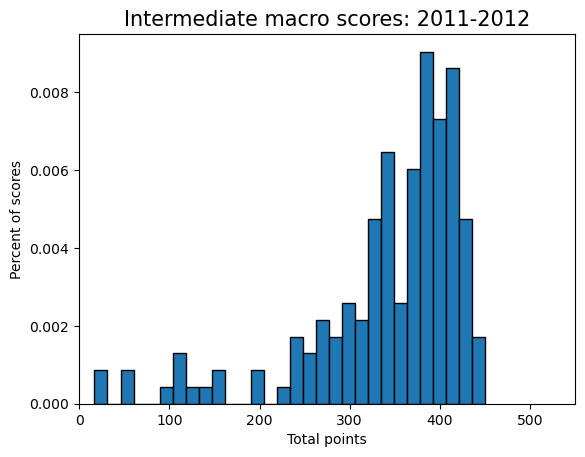

In [2]:
import matplotlib.pyplot as plt

num_bins = 30
count, bins, ignored = plt.hist(data, num_bins, density=True,
                                edgecolor='k')
plt.title('Intermediate macro scores: 2011-2012', fontsize=15)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

(SecMaxLikeli_Exerc)=
## Exercises



(SecMaxLikeliFootnotes)=
## Footnotes

The footnotes from this chapter.

[^TruncNorm]: See Section {ref}`SecAppendixTruncNormal` of the Appendix for a description of the truncated normal distribution.